**Submitted By:**
**Name:** Vivek Kumar Singh
**Mobile:** 8770485752
**Email:** vivekksingh53@gmail.com

<h1>Introduction</h1>

**What is Time Series Forecasting?**

 Time series is a collection of data points collected at constant time intervals.Time series forecasting is the use of a model to predict future values based on previously observed values.

**Univariate versus Multivariate Time Series**

**Univariate Time Series:**\
A univariate time series, as the name suggests, is a series with a single time-dependent variable.\
 
**Multivariate Time Series:**\
A Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values.

<h1>Let’s get started!</h1>

**The Data**

I am using General Electric Company (GE) data from 'https://finance.yahoo.com/quote/GE/history/' for performing the multivariate Time Series Forecasting.The dataset contains information from date: 1980-01-02 to 2021-01-01 and it is stored in 'csv' file.

**Importing Libraries**

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt

# Definiing gloabl parameters for all matplotlib plots
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


**Reading the Dataset**

In [2]:
df = pd.read_csv('GE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-01-02,1.014123,1.016627,0.976563,0.976563,0.285146,7433000
1,1980-01-03,0.976563,0.991587,0.959034,0.989083,0.288802,9185200
2,1980-01-04,0.999099,1.024139,0.999099,1.021635,0.298307,8556200
3,1980-01-07,1.021635,1.071715,1.014123,1.056691,0.308543,10518100
4,1980-01-08,1.059195,1.094251,1.059195,1.094251,0.319510,12315200


In [3]:
#Checking for any Null values and data types of each features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10350 non-null  object 
 1   Open       10350 non-null  float64
 2   High       10350 non-null  float64
 3   Low        10350 non-null  float64
 4   Close      10350 non-null  float64
 5   Adj Close  10350 non-null  float64
 6   Volume     10350 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 566.1+ KB


In [4]:
print('The shape of the dataset: ',df.shape)

The shape of the dataset:  (10350, 7)


**Data Preprocessing**

In [5]:
# Taking features which are required for forecasting

features_considered = ['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume']

features = df[features_considered]
features.index = df['Date'] # setting the column 'Date' as index for the dataframe
features.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,1.014123,1.016627,0.976563,0.976563,0.285146,7433000
1980-01-03,0.976563,0.991587,0.959034,0.989083,0.288802,9185200
1980-01-04,0.999099,1.024139,0.999099,1.021635,0.298307,8556200
1980-01-07,1.021635,1.071715,1.014123,1.056691,0.308543,10518100
1980-01-08,1.059195,1.094251,1.059195,1.094251,0.319510,12315200


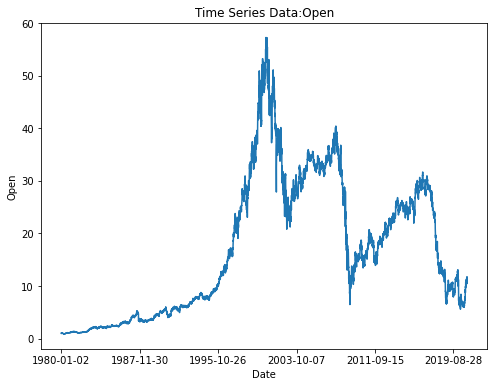

In [10]:
#Visualizing target variable:'Open' Time Series Data

features['Open'].plot()
plt.title('Time Series Data:Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [9]:
# Standardizing the features so that the optimizer will converge at faster rate and to reduce the training time.
#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. 
#It can be a good practice to rescale the data which is achieved by StandardScaler from sklearn library.

scaler = StandardScaler()
scaler = scaler.fit(features)
df_for_training_scaled = scaler.transform(features)

In [11]:
# Preparing the data for time series forecasting and making it compatible for LSTM

trainX = []
trainY = []

n_future = 1   # Number of days we want to predict into the future
n_past = 14     # Number of past days we want to use to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:features.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (10336, 14, 6).
trainY shape == (10336, 1).


**Long Short-Term Memory Network**

The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation through time and overcomes the vanishing gradient problem.

LSTM networks have memory blocks that are connected through layers.A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output.

There are three types of gates within a unit:

Forget Gate: conditionally decides what information to throw away from the block.\
Input Gate: conditionally decides which values from the input to update the memory state.\
Output Gate: conditionally decides what to output based on input and the memory of the block.

In [12]:
# LSTM architecture

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
# fitting the model

history = model.fit(trainX, trainY, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/15
582/582 [==============================] - 5s 5ms/step - loss: 0.1212 - val_loss: 0.0112
Epoch 2/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0289 - val_loss: 0.0163
Epoch 3/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0278 - val_loss: 0.0096
Epoch 4/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0258 - val_loss: 0.0038
Epoch 5/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0249 - val_loss: 0.0058
Epoch 6/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0233 - val_loss: 0.0053
Epoch 7/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0251 - val_loss: 0.0034
Epoch 8/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0239 - val_loss: 0.0063
Epoch 9/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0242 - val_loss: 0.0031
Epoch 10/15
582/582 [==============================] - 3s 5ms/step - loss: 0.0242 - val_loss: 0.0037

<AxesSubplot:xlabel='Date', ylabel='Open'>

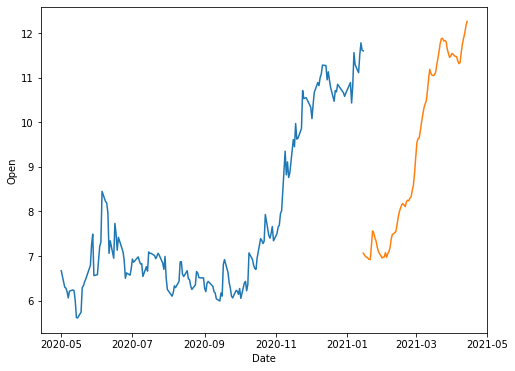

In [14]:
#Forecasting...
#Starting with the last day in training date and predict future...

n_future=90  #Redefining n_future to extend prediction dates beyond original n_future dates...
train_dates = pd.to_datetime(df['Date'])
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX[-n_future:]) #forecast 

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform

forecast_copies = np.repeat(forecast, features.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

**Confidence Interval**

Confidence intervals are a way of quantifying the uncertainty of an estimate.A confidence interval is a bounds on the estimate of a population variable. It is an interval statistic used to quantify the uncertainty on an estimate.


In [15]:
conf_int = 0.90

lower_lim = np.quantile(y_pred_future, 0.5 - conf_int/2)
upper_lim = np.quantile(y_pred_future, 0.5 + conf_int/2)

In [16]:
print(lower_lim)
print('#'*50)
print(upper_lim)

6.971200466156006
##################################################
11.87794919013977
